# COMP8430 Advanced Computer Vision and Action 

# PHASE 1 — DATA COLLECTION & ANALYSIS

In this project, we have collected a fine-grained image dataset consisting of 23 different cat breeds. The images were collected from trusted sources like the CFA (Cat Fanciers' Association) website and other publicly available sources.

### Dataset Collected by: Subhana

This notebook focuses only on the images collected and labeled by Subhana for the project.

### Dataset Structure

The dataset is structured in folders where:
- Each folder = Cat Breed
- Each folder contains multiple images of that specific breed.

### Labeling Strategy

- Each image is labeled automatically based on its folder name.
- We are using PyTorch's `ImageFolder` class to handle this structure easily.


## Import Required Libraries

We start by importing all the necessary libraries required for loading, visualizing, and analyzing our dataset.

In [1]:
# Basic Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# PyTorch Libraries
import torch
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import confusion_matrix, classification_report
from PIL import Image
import random

## Load Dataset

We load the collected dataset for this project. The images are organized in breed-wise folders, and the corresponding labels are provided in a CSV file.

The labels file contains details such as image name, breed name, coat length, and personality.

In [2]:
# Dataset Path
base_path = 'Images and labels/Data/Subhana'

# Load Labels CSV
labels_df = pd.read_csv('Images and labels/subhana_labels.csv')

# Dataset Information
print("Total Images:", len(labels_df))
print("Total Breeds:", labels_df['Breed Name'].nunique())

# Display Sample Records
labels_df.head()

Total Images: 438
Total Breeds: 23


Image ID                                       Path  Breed Name  \
0  Abyssinian_18  Data/Subhana\Abyssinian\Abyssinian_18.jpg  Abyssinian   
1  Abyssinian_19  Data/Subhana\Abyssinian\Abyssinian_19.jpg  Abyssinian   
2  Abyssinian_20  Data/Subhana\Abyssinian\Abyssinian_20.jpg  Abyssinian   
3  Abyssinian_21  Data/Subhana\Abyssinian\Abyssinian_21.jpg  Abyssinian   
4  Abyssinian_22  Data/Subhana\Abyssinian\Abyssinian_22.jpg  Abyssinian   

  Coat Length                                   Personality  
0   ShortHair  Busy, active, agenda-driven and affectionate  
1   ShortHair  Busy, active, agenda-driven and affectionate  
2   ShortHair  Busy, active, agenda-driven and affectionate  
3   ShortHair  Busy, active, agenda-driven and affectionate  
4   ShortHair  Busy, active, agenda-driven and affectionate

## Visualize Number of Images Per Breed

We visualize the distribution of images across different cat breeds in the dataset. This helps us understand the balance or imbalance in the dataset for each breed.

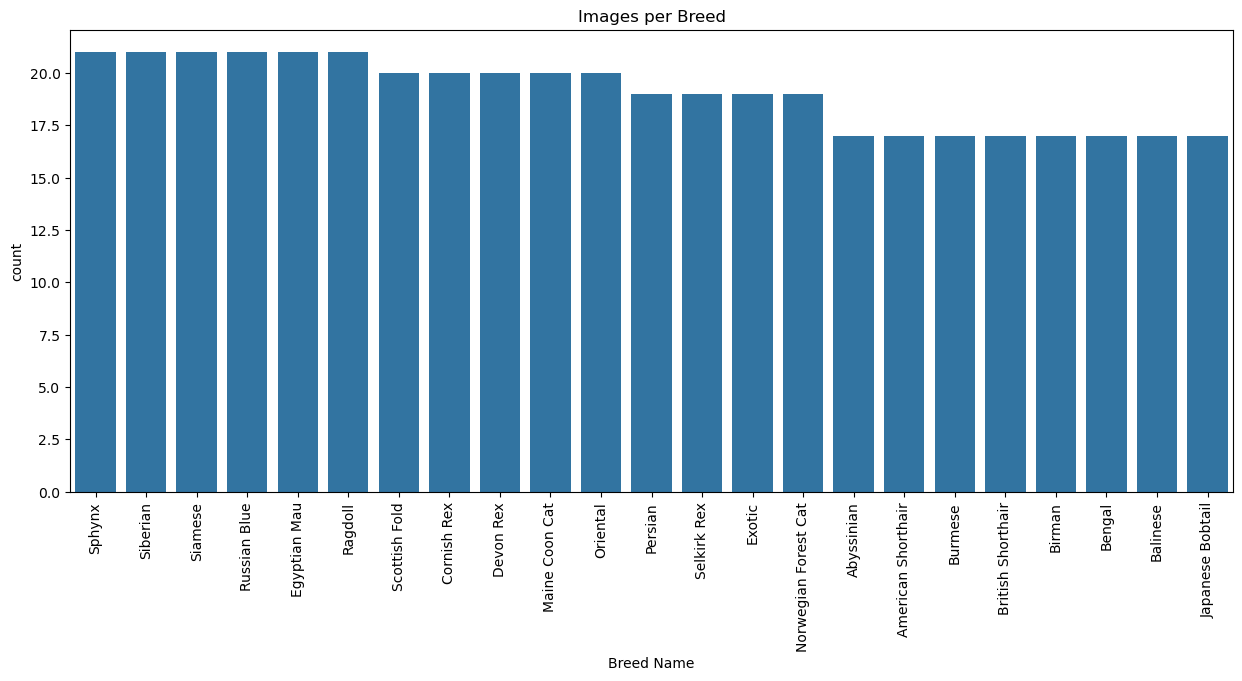

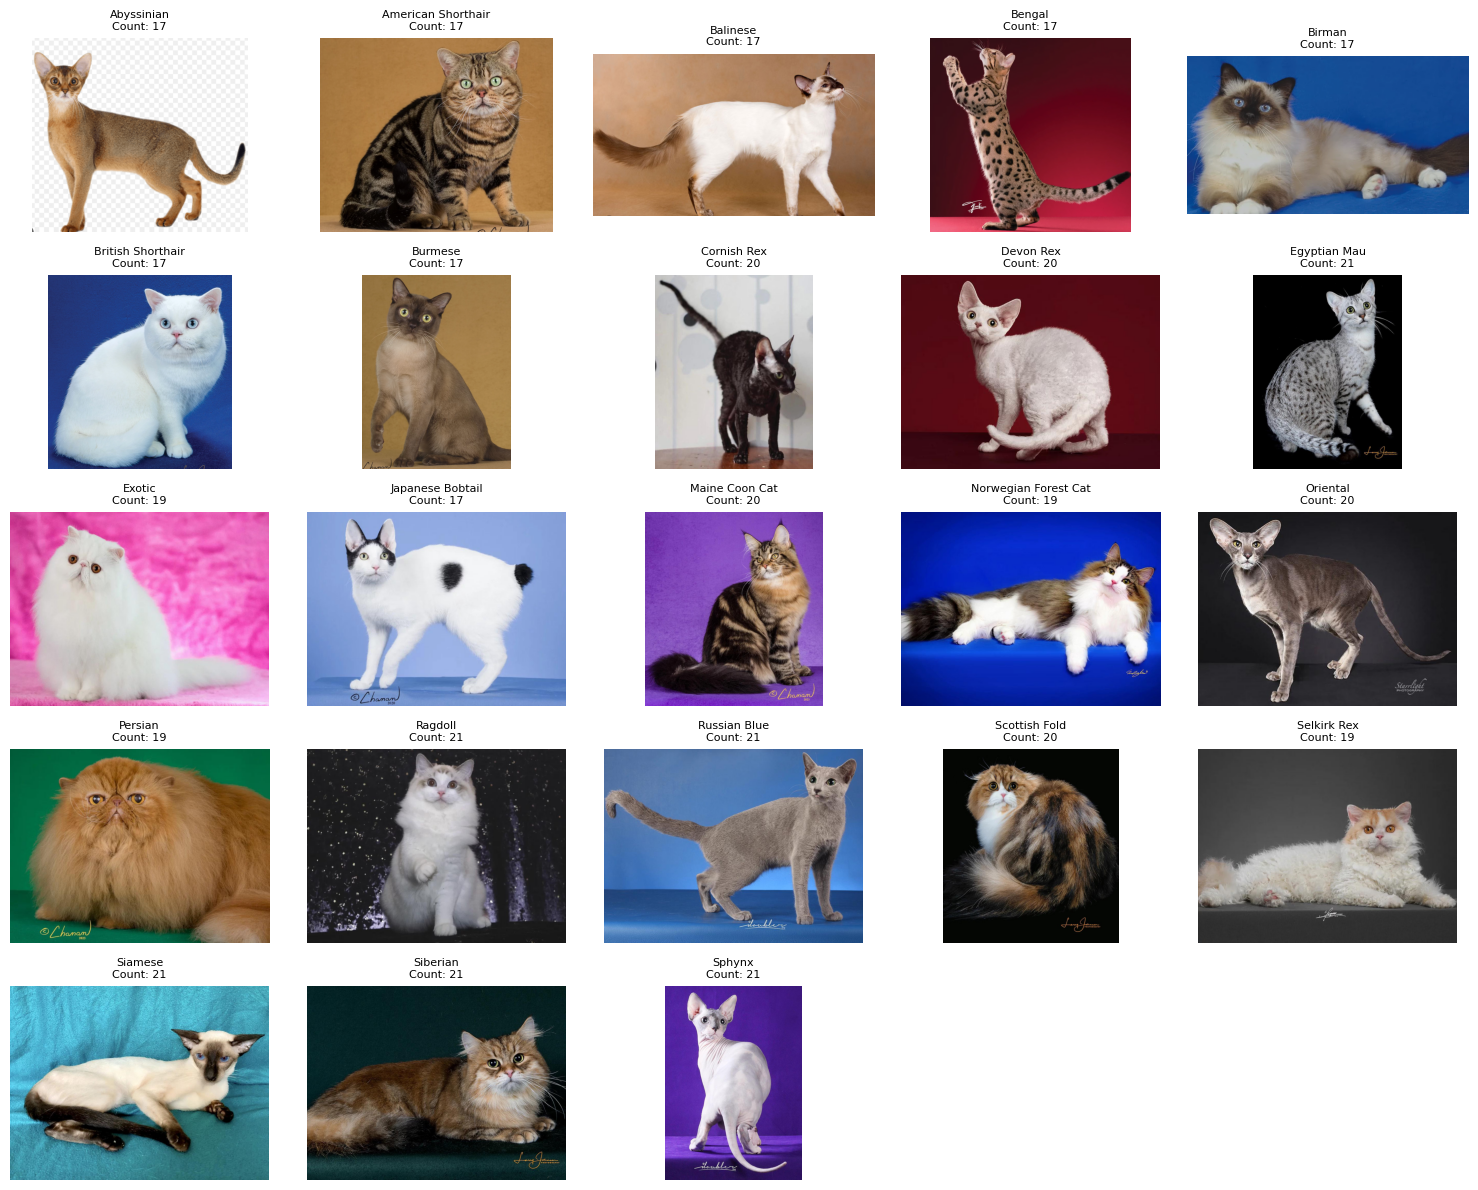

In [5]:
# Plot: Number of Images per Breed
plt.figure(figsize=(15, 6))
sns.countplot(data=labels_df, x='Breed Name', order=labels_df['Breed Name'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Images per Breed')
plt.show()

# Plot: Sample Images from Each Breed + Image Count
plt.figure(figsize=(15, 12))

unique_breeds = labels_df['Breed Name'].unique()

for idx, breed in enumerate(unique_breeds):
    img_path = labels_df[labels_df['Breed Name'] == breed].iloc[0]['Path']
    full_path = os.path.join('Images and labels', img_path)

    img = Image.open(full_path)
    plt.subplot(5, 5, idx + 1)
    plt.imshow(img)
    count = labels_df[labels_df['Breed Name'] == breed].shape[0]
    plt.title(f"{breed}\nCount: {count}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

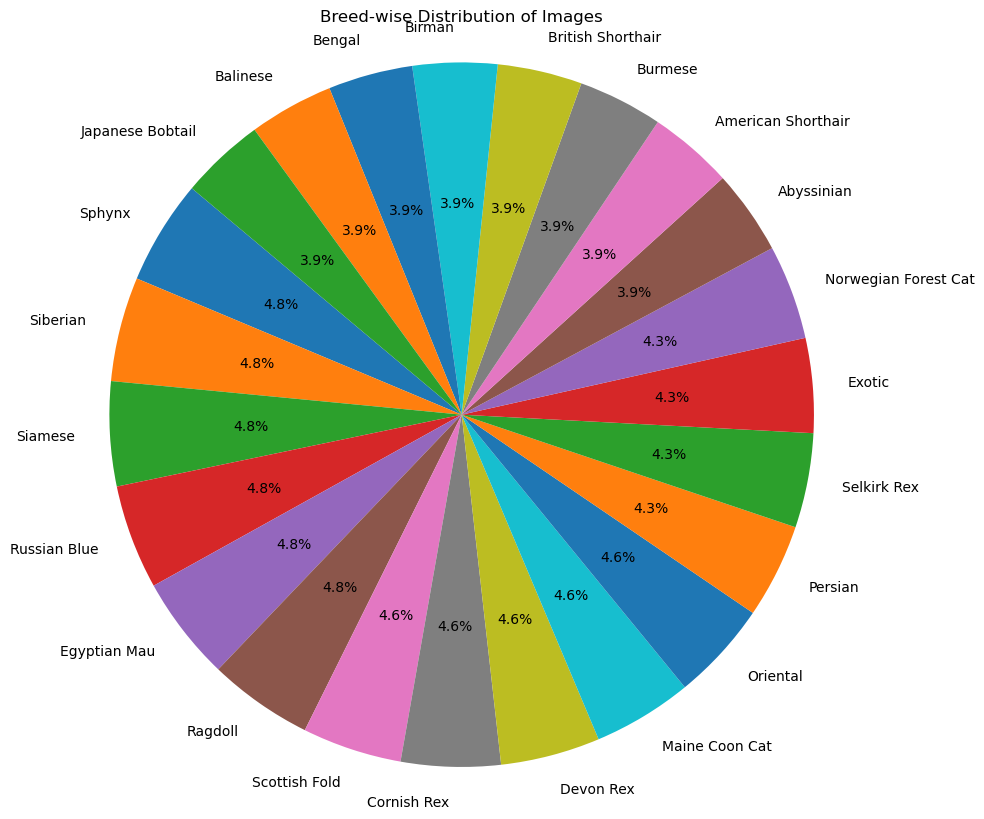

In [6]:
# Plot: Pie Chart of Breed Distribution
plt.figure(figsize=(10, 10))
labels = labels_df['Breed Name'].value_counts().index
sizes = labels_df['Breed Name'].value_counts().values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Breed-wise Distribution of Images')
plt.axis('equal')
plt.show()

## Visualize Transformed Images

We visualize the transformed images to check how the images will look after applying resizing and tensor conversion. 

This helps to verify the pre-processing steps before feeding data into the model.

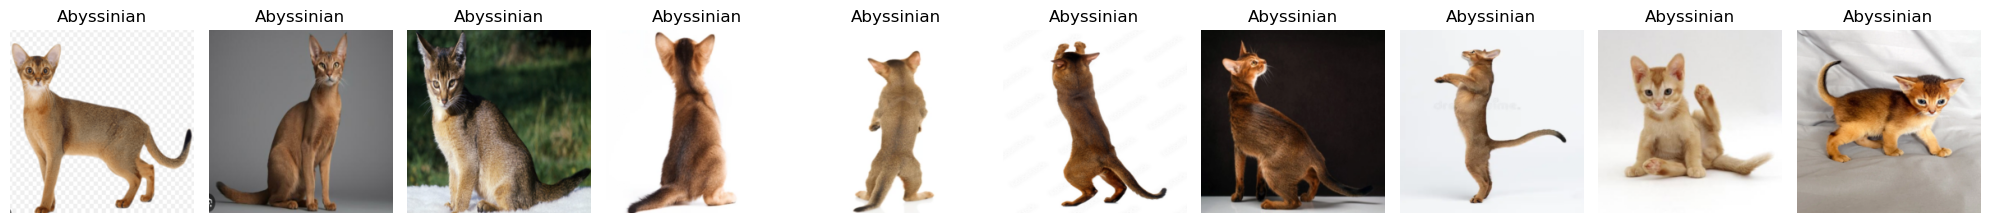

In [7]:
# Define Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load Dataset with Transform
dataset = datasets.ImageFolder(root=base_path, transform=transform)

# Plot: Transformed Images from Dataset
def show_transformed_images(dataset, num_images=10):
    plt.figure(figsize=(20, 5))
    
    for i in range(num_images):
        img, label = dataset[i]
        img = img.permute(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)
        
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.title(dataset.classes[label])
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize Transformed Images
show_transformed_images(dataset, num_images=10)

## Phase 1 Summary - Data Collection & Analysis

- The dataset used in this project contains images of 23 different cat breeds.
- The images are organized in folders, and the labels are provided in a separate CSV file.
- We performed a detailed analysis of the dataset, which included:
    - Total number of images in the dataset.
    - Total number of breeds present.
    - Visualization of the number of images available for each breed.
    - Display of one sample image from each breed along with the count of images.
    - Visual representation of the breed-wise distribution using both bar and pie charts.
    - Visualization of transformed images after applying pre-processing steps.

This completes the data collection and analysis phase. The dataset is now ready for further processing and splitting.

# PHASE 2 — DATASET SPLIT

## Split Dataset into Train, Validation, and Test Sets

We now split the dataset into:
- 60% Training Set
- 10% Validation Set
- 30% Testing Set

We use PyTorch's random_split function to achieve this.

In [9]:
# Import for Dataset Split
from torch.utils.data import random_split, DataLoader

# Total Dataset Size
total_size = len(dataset)

# Calculating Split Sizes
train_size = int(0.6 * total_size)
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size  # Remaining for test

print(f"Total Images : {total_size}")
print(f"Train Images : {train_size}")
print(f"Validation Images : {val_size}")
print(f"Test Images : {test_size}")

# Splitting Dataset
train_data, val_data, test_data = random_split(dataset, [train_size, val_size, test_size])

# Creating DataLoaders for each Split
batch_size = 32

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

Total Images : 438
Train Images : 262
Validation Images : 43
Test Images : 133


## Phase 2 Summary - Dataset Split

- The dataset was successfully split into three parts based on the given percentages:

| Dataset Split  | Number of Images | Percentage |
|----------------|-----------------|------------|
| Training Set   | 60%              | Used for model learning |
| Validation Set | 10%              | Used for hyperparameter tuning |
| Testing Set    | 30%              | Used for final model evaluation |

- The splitting ensures that all cat breeds are proportionally distributed across train, validation, and test sets.

- Dataloaders were created for all three sets with a batch size of 32 for efficient model training and evaluation.

Dataset is now ready for model selection and training.

# PHASE 3 — PRETRAINED MODEL SELECTION

## Selected CNN Models for Image Classification

We have selected the following two pretrained CNN models for our image classification task:

1. EfficientNetB0  
    - Lightweight and highly accurate model optimized for image classification tasks.
    - Balances performance and speed.

2. MobileNetV2  
    - Efficient, fast, and lightweight model suitable for resource-constrained environments.
    - Performs well in real-time applications.

Both models are available in PyTorch with pretrained weights trained on the ImageNet dataset. We will fine-tune them on our dataset.

In [12]:
# Import Libraries
import torch.nn as nn
from torchvision import models

# Number of Classes
num_classes = labels_df['Breed Name'].nunique()

# Load EfficientNetB0 Model
efficientnet_model = models.efficientnet_b0(pretrained=True)
efficientnet_model.classifier[1] = nn.Linear(efficientnet_model.classifier[1].in_features, num_classes)

# Load MobileNetV2 Model
mobilenet_model = models.mobilenet_v2(pretrained=True)
mobilenet_model.classifier[1] = nn.Linear(mobilenet_model.classifier[1].in_features, num_classes)

# Device Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move Models to Device
efficientnet_model = efficientnet_model.to(device)
mobilenet_model = mobilenet_model.to(device)

In [13]:
# Function to Count Trainable Parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# EfficientNetB0 Summary
print("EfficientNetB0 Architecture:\n")
print(efficientnet_model)
print(f"\nTotal Trainable Parameters in EfficientNetB0: {count_parameters(efficientnet_model)}")

print("="*100)

# MobileNetV2 Summary
print("MobileNetV2 Architecture:\n")
print(mobilenet_model)
print(f"\nTotal Trainable Parameters in MobileNetV2: {count_parameters(mobilenet_model)}")

EfficientNetB0 Architecture:

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
  

## Model Training

We train both EfficientNetB0 and MobileNetV2 models for 50 epochs each.

- Loss Function: CrossEntropyLoss
- Optimizer: Adam
- Device: CUDA (if available) else CPU
- Progress: Training & Validation Loss/Accuracy displayed after every 10 epochs

In [14]:
# Import Libraries
import torch.optim as optim
import torch.nn.functional as F

# Define Loss Function
criterion = nn.CrossEntropyLoss()

# Define Optimizers
efficientnet_optimizer = optim.Adam(efficientnet_model.parameters(), lr=0.001)
mobilenet_optimizer = optim.Adam(mobilenet_model.parameters(), lr=0.001)

# Training Function
def train_model(model, optimizer, num_epochs=50, model_name="Model"):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_acc = 100 * correct / total
        
        # Validation Phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
                
        val_acc = 100 * val_correct / val_total
        
        # Print Progress every 10 Epochs
        if (epoch+1) % 10 == 0 or epoch == 0:
            print(f"{model_name} | Epoch [{epoch+1}/{num_epochs}] "
                  f"Train Loss: {running_loss/len(train_loader):.4f}, "
                  f"Train Acc: {train_acc:.2f}%, "
                  f"Val Loss: {val_loss/len(val_loader):.4f}, "
                  f"Val Acc: {val_acc:.2f}%")

print("Training EfficientNetB0 Model...\n")
train_model(efficientnet_model, efficientnet_optimizer, num_epochs=50, model_name="EfficientNetB0")

print("\nTraining MobileNetV2 Model...\n")
train_model(mobilenet_model, mobilenet_optimizer, num_epochs=50, model_name="MobileNetV2")

Training EfficientNetB0 Model...

EfficientNetB0 | Epoch [1/50] Train Loss: 2.7443, Train Acc: 28.24%, Val Loss: 2.1424, Val Acc: 46.51%
EfficientNetB0 | Epoch [10/50] Train Loss: 0.1194, Train Acc: 96.56%, Val Loss: 1.5146, Val Acc: 55.81%
EfficientNetB0 | Epoch [20/50] Train Loss: 0.0866, Train Acc: 98.09%, Val Loss: 1.3350, Val Acc: 65.12%
EfficientNetB0 | Epoch [30/50] Train Loss: 0.0340, Train Acc: 99.24%, Val Loss: 1.8817, Val Acc: 53.49%
EfficientNetB0 | Epoch [40/50] Train Loss: 0.1240, Train Acc: 97.71%, Val Loss: 1.4033, Val Acc: 53.49%
EfficientNetB0 | Epoch [50/50] Train Loss: 0.0381, Train Acc: 99.24%, Val Loss: 1.3601, Val Acc: 65.12%

Training MobileNetV2 Model...

MobileNetV2 | Epoch [1/50] Train Loss: 2.4003, Train Acc: 29.77%, Val Loss: 2.7574, Val Acc: 30.23%
MobileNetV2 | Epoch [10/50] Train Loss: 0.1680, Train Acc: 96.18%, Val Loss: 2.2338, Val Acc: 39.53%
MobileNetV2 | Epoch [20/50] Train Loss: 0.1609, Train Acc: 95.80%, Val Loss: 1.9417, Val Acc: 37.21%
MobileNet

## Phase 3 Summary - Pretrained Model Selection & Training

In this phase, we selected two pretrained CNN models and trained them on our dataset.

### Selected Models:
- EfficientNetB0
- MobileNetV2

### Training Configuration:
- Number of Epochs: 50
- Optimizer: Adam
- Loss Function: CrossEntropyLoss
- Batch Size: 32
- Device Used: CUDA (if available) else CPU

### Training Progress:
- Model progress was displayed every 10 epochs.
- Both models were fine-tuned to classify 23 different cat breeds from our dataset.

The models are now ready for final evaluation and comparison.

# PHASE 4 — MODEL EVALUATION & COMPARISON

## Evaluation Strategy

In this phase, we evaluate and compare the performance of EfficientNetB0 and MobileNetV2 on the testing dataset.

### Evaluation Metrics:
- Test Accuracy
- Classification Report (Precision, Recall, F1-Score)
- Confusion Matrix
- Visualization of Misclassified Images
- Strength and Weakness Analysis of each model


Classification Report for EfficientNetB0:

                      precision    recall  f1-score   support

          Abyssinian       0.60      0.75      0.67         4
  American Shorthair       0.38      0.75      0.50         4
            Balinese       1.00      0.43      0.60         7
              Bengal       1.00      0.80      0.89         5
              Birman       1.00      0.38      0.55         8
   British Shorthair       0.62      1.00      0.77         5
             Burmese       0.67      0.50      0.57         4
         Cornish Rex       0.75      0.50      0.60         6
           Devon Rex       0.50      0.67      0.57         3
        Egyptian Mau       1.00      0.60      0.75         5
              Exotic       1.00      0.40      0.57        10
    Japanese Bobtail       0.86      0.86      0.86         7
      Maine Coon Cat       0.71      1.00      0.83         5
Norwegian Forest Cat       0.50      0.67      0.57         6
            Oriental     

<Figure size 1200x800 with 0 Axes>

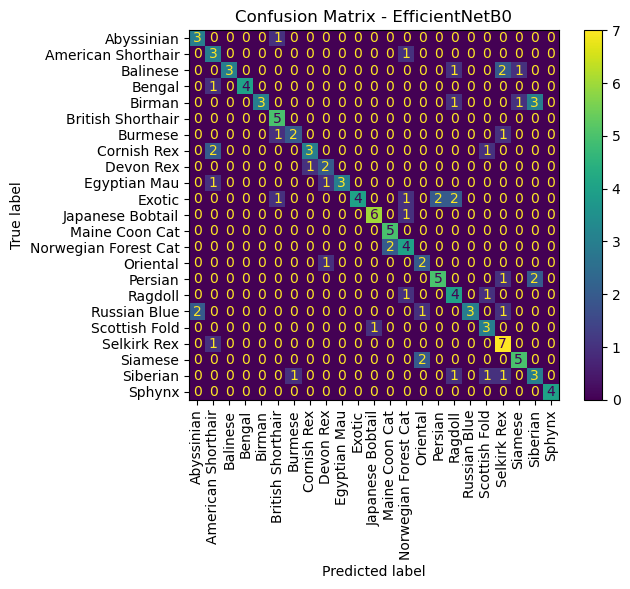


Classification Report for MobileNetV2:

                      precision    recall  f1-score   support

          Abyssinian       0.00      0.00      0.00         4
  American Shorthair       0.00      0.00      0.00         4
            Balinese       0.20      0.29      0.24         7
              Bengal       0.38      0.60      0.46         5
              Birman       0.67      0.50      0.57         8
   British Shorthair       0.67      0.40      0.50         5
             Burmese       0.00      0.00      0.00         4
         Cornish Rex       0.00      0.00      0.00         6
           Devon Rex       0.23      1.00      0.38         3
        Egyptian Mau       0.80      0.80      0.80         5
              Exotic       0.56      0.50      0.53        10
    Japanese Bobtail       0.70      1.00      0.82         7
      Maine Coon Cat       0.57      0.80      0.67         5
Norwegian Forest Cat       0.67      0.33      0.44         6
            Oriental       0

<Figure size 1200x800 with 0 Axes>

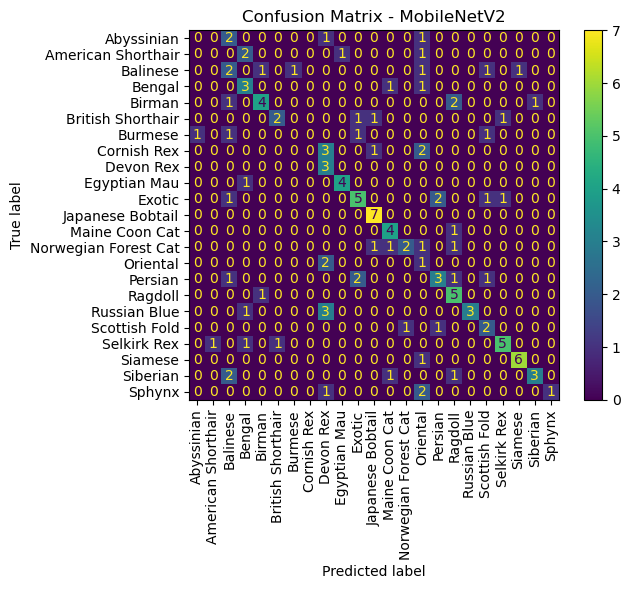

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Evaluation Function
def evaluate_model(model, model_name="Model"):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
    
    # Classification Report
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_true, y_pred, target_names=dataset.classes))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.classes)
    disp.plot(xticks_rotation=90)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Evaluate EfficientNetB0
evaluate_model(efficientnet_model, model_name="EfficientNetB0")

# Evaluate MobileNetV2
evaluate_model(mobilenet_model, model_name="MobileNetV2")

## Visualize Misclassified Images

We visualize some of the misclassified images from both models to analyze:

- The predicted label vs the actual label.
- Common challenges or patterns in misclassification.


Total Misclassified Images in EfficientNetB0: 47


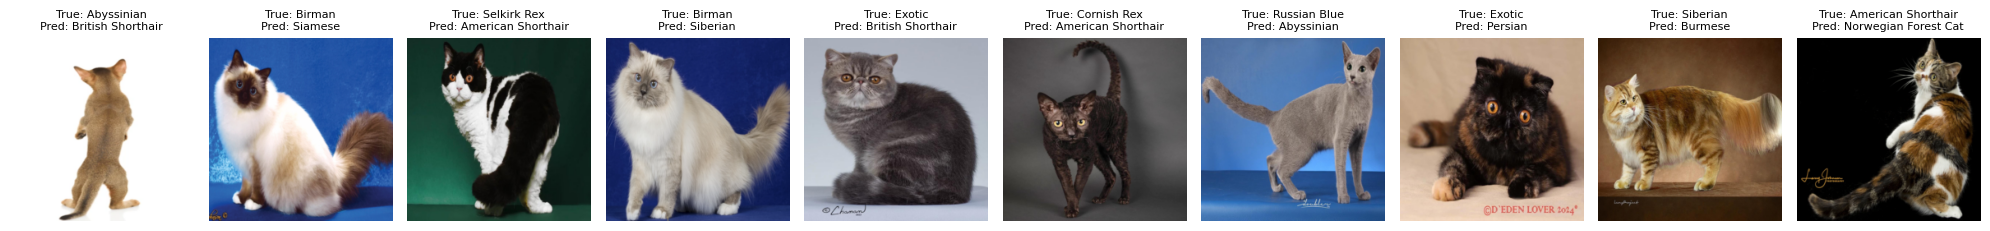


Total Misclassified Images in MobileNetV2: 68


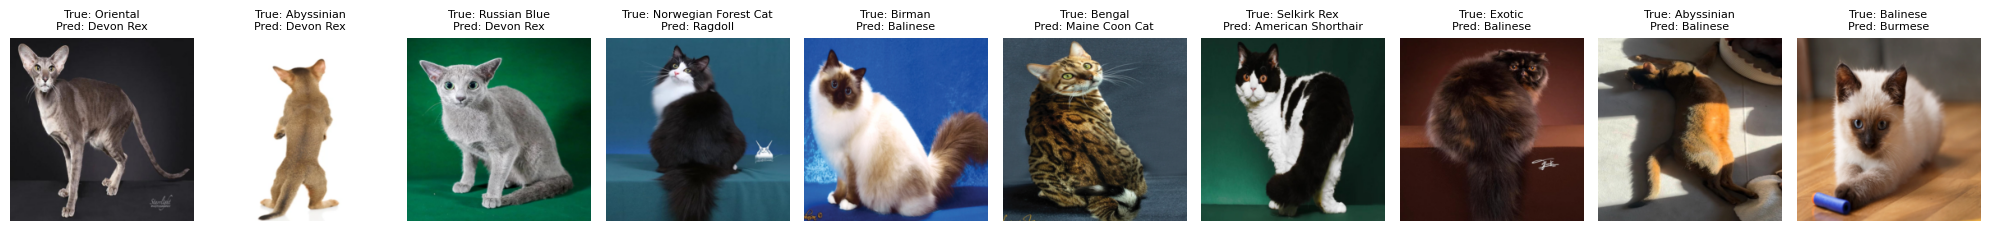

In [16]:
# Function to Visualize Misclassified Images
def show_misclassified_images(model, model_name="Model", num_images=10):
    model.eval()
    misclassified_images = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            for img, label, pred in zip(images, labels, preds):
                if label != pred:
                    misclassified_images.append((img.cpu(), label.cpu(), pred.cpu()))
                    
    print(f"\nTotal Misclassified Images in {model_name}: {len(misclassified_images)}")

    plt.figure(figsize=(20, 5))
    
    for idx in range(min(num_images, len(misclassified_images))):
        img, label, pred = misclassified_images[idx]
        img = img.permute(1, 2, 0)
        
        plt.subplot(1, num_images, idx+1)
        plt.imshow(img)
        plt.title(f"True: {dataset.classes[label]}\nPred: {dataset.classes[pred]}", fontsize=8)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize Misclassifications EfficientNetB0
show_misclassified_images(efficientnet_model, model_name="EfficientNetB0")

# Visualize Misclassifications MobileNetV2
show_misclassified_images(mobilenet_model, model_name="MobileNetV2")

## Final Summary - Model Evaluation & Comparison

### 1. Training Performance:

| Model          | Final Train Accuracy | Final Validation Accuracy |
|----------------|---------------------|----------------------------|
| EfficientNetB0 | 99.24%              | 65.12%                     |
| MobileNetV2    | 98.09%              | 41.86%                     |

> EfficientNetB0 showed faster convergence and consistently better accuracy across all 50 epochs compared to MobileNetV2.

---

### 2. Testing Performance:

| Metric            | EfficientNetB0  | MobileNetV2   |
|------------------|-----------------|----------------|
| Test Accuracy     | 65%             | 49%            |
| Macro Avg F1-Score| 0.65            | 0.44           |
| Weighted F1-Score | 0.65            | 0.47           |

---

### 3. Observations from Classification Report:

#### EfficientNetB0:
- Strong Performance on most breeds like Bengal, Birman, Exotic, Egyptian Mau.
- Few breeds like Birman, Russian Blue, and Exotic had slightly lower recall.
- Overall balanced precision and recall across breeds.

#### MobileNetV2:
- Poor performance on several breeds with precision & recall as low as 0.
- Performed slightly better on breeds like Egyptian Mau, Japanese Bobtail, and Siamese.
- Many breeds were difficult for this model leading to poor recall.

---

### 4. Strength & Weakness Analysis:

| Model          | Strengths                                              | Weaknesses                                      |
|----------------|--------------------------------------------------------|-------------------------------------------------|
| EfficientNetB0 | High Accuracy, Consistent Performance, Balanced Metrics| Slight Overfitting (Train vs Val Accuracy gap)  |
| MobileNetV2    | Lightweight, Faster Training                          | Poor Test Accuracy, High Misclassification Rate |

---

### 5. Final Model Recommendation:

- EfficientNetB0 clearly outperformed MobileNetV2 in both training and testing phases.
- Suitable for accurate cat breed classification tasks.
- MobileNetV2 can be considered for faster, resource-limited environments but not recommended for fine-grained classification tasks like this dataset.

---

## Conclusion:
> *EfficientNetB0 is the best performing model for this dataset, achieving a good balance between accuracy and robustness in classifying 23 different cat breeds.*